## Quiz #0307

### "EDA and ANOVA for guinea pig tooth growth"

In [39]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import os
%matplotlib inline

#### Answer the following questions by providing Python code:

We will use the dataset "data_ToothGrowth.csv". 
- len = teeth length. 
- supp = supplementary type with two possible values: VC (vitamin C) or OJ (orange juice). 
- dose (mgr/day) = dosage per day with three possible values: 0.5, 1.0, 2.0.

In [40]:
# Go to the directory where the data file is located. 
os.chdir(r'C:\Users\pc\Downloads')                # Please, replace the path with your own.  

In [41]:
df = pd.read_csv('data_ToothGrowth.csv', header='infer')

In [42]:
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


In [43]:
df.tail()

,len,supp,dose
55,30.9,OJ,2.0
56,26.4,OJ,2.0
57,27.3,OJ,2.0
58,29.4,OJ,2.0
59,23.0,OJ,2.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   len     60 non-null     float64
 1   supp    60 non-null     object 
 2   dose    60 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


1). Perform the EDA and ANOVA ($\alpha=$ 5%) with the 'supp' variable. <br>
Summarize the result.

In [45]:
# Categories of 'supp'. 
df.supp.value_counts ("supp")

VC    0.5
OJ    0.5
Name: supp, dtype: float64

In [46]:
# Group by category.
n = pd.crosstab( df.supp ,  columns = "normelize", normalize = True)
n

col_0,normelize
supp,
OJ,0.5
VC,0.5


In [47]:
# Multiple Boxplots.
df.quantile(0.05)

len     6.37
dose    0.50
Name: 0.05, dtype: float64

array([<AxesSubplot:title={'center':'dose'}, xlabel='[supp]'>,
       <AxesSubplot:title={'center':'len'}, xlabel='[supp]'>],
      dtype=object)

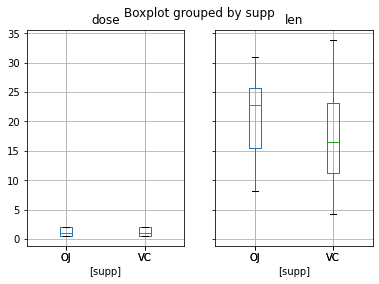

In [90]:
df.boxplot(by = "supp")

In [76]:
# ANOVA.
oj = df[df.supp=='OJ']
vc = df[df.supp=='VC']

res=st.f_oneway(oj ["len"], vc["len"])
print("Test statistic  : %f " % res[0] )
print("p-value         : %f " % res[1] )


Test statistic  : 3.668253 
p-value         : 0.060393 


**Result summary** \
0.05 < p-value 
we accept the hypothesis \
they are equal or relatively equal

2). Perform the EDA and ANOVA ($\alpha=$ 5%) with the 'dose' variable. <br>
Summarize the result.

In [66]:
# Categories of 'dose'. 
df.dose.value_counts()

2.0    20
1.0    20
0.5    20
Name: dose, dtype: int64

In [67]:
# Group by category.
pd.crosstab( df.dose ,  columns = "normelize", normalize = True)

col_0,normelize
dose,
0.5,0.333333
1.0,0.333333
2.0,0.333333


<AxesSubplot:title={'center':'len'}, xlabel='[dose]'>

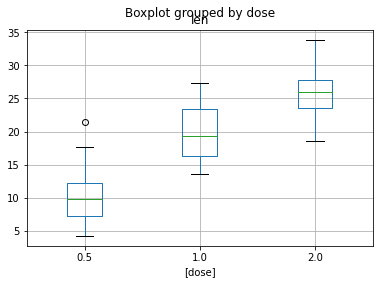

In [91]:
# Multiple Boxplots

df.boxplot(by = "dose")

In [82]:
# ANOVA.
dose1 = df[df.dose==0.5]
dose2 = df[df.dose==1.0]
dose3 = df[df.dose==2.0]

res=st.f_oneway( dose1["len"], dose2["len"], dose3["len"] )
print("Test statistic  : %f " % res[0] )
print("p-value         : %f " % res[1] )

Test statistic  : 67.415738 
p-value         : 0.000000 


**Result summary.**\
0.05 > p-value 
we reject the hypothesis \
at least one of them is not equal